<a href="https://colab.research.google.com/github/mrbseba/dataReductionVisualization/blob/main/ProjectModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part I. Swiss-roll dataset 
1. Generate the swis-roll dataset with 2000 points using the function 
datasets.make_swiss_roll
2. Apply the PCA and plot the data. 
3. Apply LLE (Local Linear Embedding) with 5 neighbours 
(manifold.locally_linear_embedding) by printing the error. Change the number 
of neighbours from 2 to 15 and plot the error line. Which is the best number of 
neighbours ?
4. Use Multi Dimensional Scaling with manifold.MDS and visualize the dataset 
in 2 dimension. 
5. Apply t-SNE model to the same dataset with manifold.TSNE. 
Visualize the dataset. 
6. Conclude and give the details of the best model

error: 4.8821515446903075e-18
[[ -3.26836571  -2.60114768]
 [ -0.47682125  13.63259881]
 [ -3.49428637   0.42131741]
 ...
 [ -2.28624166   1.21355817]
 [-12.68325768   1.09909015]
 [  8.91540214   9.50791399]]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ 67.37779   -7.564867]
 [-66.73147   11.860351]
 [ 59.300167 -16.475452]
 ...
 [ 58.015507 -11.02124 ]
 [-34.583458   9.511057]
 [-56.544086  37.038235]]


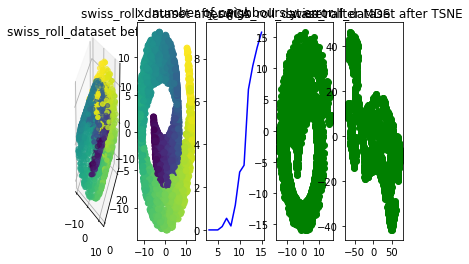

In [ ]:
# Swiss-roll dataset
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from sklearn.manifold import MDS as mds
from sklearn.manifold import TSNE as tsne

swissRollDataset = 2000

# generate the swis-roll dataset with 2000 points using the function
swiss_roll_p, swiss_roll_c = sklearn.datasets.make_swiss_roll(n_samples = swissRollDataset)
fig = plt.figure()
plt_before = fig.add_subplot(151, projection = "3d")
plt_before.scatter(swiss_roll_p[:, 0], swiss_roll_p[:, 1], swiss_roll_p[:, 2], c = swiss_roll_c)
plt_before.set_title('swiss_roll_dataset before PCA')


# apply the PCA and plot the data
srPCA = PCA(n_components = 2)
swiss_roll_PCA = srPCA.fit(swiss_roll_p, swiss_roll_c).transform(swiss_roll_p)
plt_after = fig.add_subplot(152)
plt_after.scatter(swiss_roll_PCA[:, 0], swiss_roll_PCA[:, 1], c = swiss_roll_c)
plt_after.set_title('swiss_roll_dataset after PCA')


# apply LLE (Local Linear Embedding)
swiss_roll_p_lle, swiss_roll_lle_error = manifold.locally_linear_embedding(swiss_roll_p, n_neighbors=5, n_components=2)
print("error: " + str(swiss_roll_lle_error))
arr32lle_in = list()
arr32lle_err = list()

for i in range(2, 16):
  try:
    swiss_roll_p_lle, err = manifold.locally_linear_embedding(swiss_roll_p, n_neighbors=i, n_components=2)
    arr32lle_err.append(err)
    arr32lle_in.append(i)
  except:
    pass

plt_after = fig.add_subplot(153) 
plt_after.plot(arr32lle_in, arr32lle_err, c = 'blue')
plt_after.set_title('x: number of neighbours y: error')


# use Multi Dimensional Scaling with manifold.MDS and visualize the dataset in 2 dimension.
swiss_roll_p_mds = mds(n_components=2).fit_transform(swiss_roll_p)
print(swiss_roll_p_mds)
plt_after_mds = fig.add_subplot(154)
plt_after_mds.scatter(swiss_roll_p_mds[:, 0], swiss_roll_p_mds[:, 1], c = 'green')
plt_after_mds.set_title('swiss_roll_dataset after MDS')


# apply t-SNE model to the same dataset with manifold.TSNE. Visualize the dataset.
swiss_roll_p_tsne = tsne(n_components=2).fit_transform(swiss_roll_p)
print(swiss_roll_p_tsne)
plt_after_tsne = fig.add_subplot(155)
plt_after_tsne.scatter(swiss_roll_p_tsne[:, 0], swiss_roll_p_tsne[:, 1], c = 'green')
plt_after_tsne.set_title('swiss_roll_dataset after TSNE')
plt.show()


error: 8.424442580364081e-17


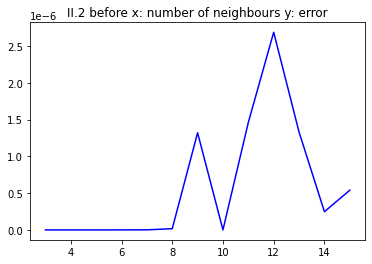

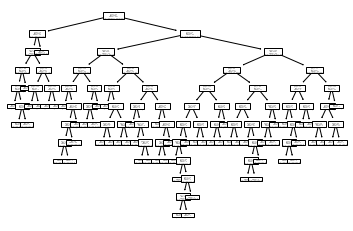

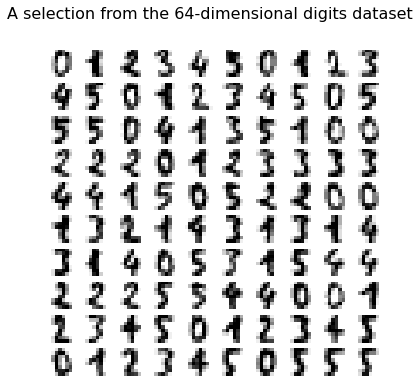

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as pr
from matplotlib import offsetbox
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import manifold

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

swiss_roll_p_lle, swiss_roll_lle_error = manifold.locally_linear_embedding(X, n_neighbors=5, 
n_components=2)
print("error: " + str(swiss_roll_lle_error))
arr32lle_in = list()
arr32lle_err = list()
fig = plt.figure()
for i in range(2, 16):
  try:
    swiss_roll_p_lle, err = manifold.locally_linear_embedding(X, n_neighbors=i, n_components = 2)
    arr32lle_err.append(err)
    arr32lle_in.append(i)
  except:
    pass
plt_after = fig.add_subplot(111)
plt_after.plot(arr32lle_in, arr32lle_err, c='blue')
plt_after.set_title('II.2 before x: number of neighbours y: error')
plt.show()
clf = DecisionTreeClassifier()
clf = clf.fit(X=X, y=y)
tree.plot_tree(clf)
plt.show()

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
  ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
  ax.axis("off")
  _ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
plt.show()

def plot_embedding(X, title):
  _, ax = plt.subplots()
  X = pr.MinMaxScaler().fit_transform(X)
  for digit in digits.target_names:
    ax.scatter(
        *X[y == digit].T, 
        marker=f"${digit}$", 
        s=60, color=plt.cm.Dark2(digit), 
        alpha=0.425, zorder=2,
        ) 
  
  shown_images = np.array([[1.0, 1.0]])
  
  for i in range(X.shape[0]):
    dist = np.sum((X[i] - shown_images) ** 2, 1)
    if np.min(dist) < 4e-3:
      continue
    shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
    
    imagebox = offsetbox.AnnotationBbox(
      offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
    )

    imagebox.set(zorder = 1)
    ax.add_artist(imagebox)

  ax.set_title(title)
  ax.axis("off")
  embeddings = {
  "Random projection embedding": SparseRandomProjection(n_components=2, random_state=42),
  
  "Truncated SVD embedding": TruncatedSVD(n_components=2),
  
  "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis( n_components = 2),

  "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components = 2),
  
  "Standard LLE embedding": LocallyLinearEmbedding( n_neighbors=n_neighbors, n_components=2, method = "standard"),
  
  "Modified LLE embedding": LocallyLinearEmbedding( n_neighbors=n_neighbors, n_components=2, method = "modified"),

  "Hessian LLE embedding": LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method = "hessian"),

  "LTSA LLE embedding": LocallyLinearEmbedding(  n_neighbors=n_neighbors, n_components=2, method = "ltsa"),

  "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),

  "Random Trees embedding": make_pipeline( RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0), TruncatedSVD(n_components=2), ),
  
  "Spectral embedding": SpectralEmbedding( n_components=2, random_state=0, eigen_solver="arpack"), "t-SNE embeedding": TSNE(
    n_components=2,
    n_iter=500,
    n_iter_without_progress=150,
    n_jobs=2,
    random_state = 0, ), "NCA embedding": NeighborhoodComponentsAnalysis( n_components=2, init="pca", random_state = 0),}
  
  projections, timing = {}, {}

  for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
      data = X.copy()
      data.flat[:: X.shape[1] + 1] += 0.01 # Make X invertible
    else:
      data = X
    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time
  for name in timing:
    lst = []
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)
  plt.show()


  
  # 2
  lst = zip(projections.keys(), projections.values())
  lst = list(lst)
  lst2 = [[], [], []]

  for i in range(0, len(lst)):
    for j in range(0, len(lst[i][1])):
      lst2[0].append(lst[i][0])
      lst2[1].append(lst[i][1][j][0])
      lst2[2].append(lst[i][1][j][1])
  X = lst2[1:3]
  y = lst2[0]
  arrX = np.ndarray(shape=(len(X[0]), 2))

  for i in range(0, 1):
    for j in range(0, len(X[0]) - 1):
      arrX[j, i] = X[i][j]

  swiss_roll_p_lle, swiss_roll_lle_error = manifold.locally_linear_embedding(arrX, 
  n_neighbors=5, n_components=2)
  print("error: " + str(swiss_roll_lle_error))
  arr32lle_in = list()
  arr32lle_err = list()
  fig = plt.figure()
  for i in range(2, 16):
    try:
      swiss_roll_p_lle, err = manifold.locally_linear_embedding(arrX, n_neighbors=i, n_components=2)
      arr32lle_err.append(err)
      arr32lle_in.append(i)
    except:
      pass
  plt_after = fig.add_subplot(111)
  plt_after.plot(arr32lle_in, arr32lle_err, c='blue')
  plt_after.set_title('II.2 before x: number of neighbours y: error')
  plt.show()
 

  clf = DecisionTreeClassifier()
  clf = clf.fit(X=arrX, y=y)
  tree.plot_tree(clf)
  plt.show()